In [1]:
import tensorflow as tf
from Dirichlet_BC_NN import *#Dirichlet_BC_NN, Dirichlet_BC_NN_2
from Lp_integral_norm import Lp_integral_norm
from generate_laplace_soln import generate_laplace_soln
import numpy as np
import matplotlib.pyplot as plt
#tf.enable_eager_execution()
tf.keras.backend.set_floatx('float64')

In [2]:
#mod = Dirichlet_BC_NN()
mod = Dirichlet_BC_NN_2B(data_format = 'channels_first')
#mod = Dirichlet_BC_NN_3()

In [3]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)

In [4]:
#from conv_laplacian_loss import conv_laplacian_loss
while True:
    b, soln, dx = generate_laplace_soln(batch_size=75, nonzero_boundaries=['left'], smoothness=np.random.randint(5,20), nx = np.random.randint(64,128), ny = np.random.randint(64,128))
    mod.x_output_resolution = soln.shape[-2]
    lf = Lp_integral_norm((soln.shape[-2], soln.shape[-1]), [0,soln.shape[-2] * dx, 0, soln.shape[-1] * dx], n_quadpts = 25, mse_component_weight = 1e+1)
    #cll = conv_laplacian_loss((soln.shape[-2], soln.shape[-1]))
    with tf.GradientTape() as tape:
        tape.watch(mod.trainable_variables)
        
        #loss versions with dx arg
        #loss = tf.reduce_sum(tf.losses.mean_squared_error(soln, mod([tf.expand_dims(b['left'], axis = 1),dx * tf.ones((soln.shape[0],1), dtype = 'float64')])))
        loss = lf(soln, mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')]))
        
        #loss versions with no dx arg
        #loss = lf(soln, mod(tf.expand_dims(b['left'], axis = 1)))
        #loss = tf.reduce_sum(tf.losses.mean_squared_error(soln, mod(tf.expand_dims(b['left'], axis = 1))))
    grads = tape.gradient(loss, mod.trainable_variables)
    optimizer.apply_gradients(zip(grads, mod.trainable_variables))
    print(loss)

tf.Tensor(0.8615476260100909, shape=(), dtype=float64)


KeyboardInterrupt: 

In [5]:
mod.load_weights('Dirichlet_BC_NN_2B.h5')
mod.summary()

Model: "dirichlet_bc_nn_2b"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  24        
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  168       
_________________________________________________________________
conv1d_2 (Conv1D)            multiple                  10496     
_________________________________________________________________
sep_conv_block (SepConvBlock multiple                  15752     
_________________________________________________________________
sep_conv_block_1 (SepConvBlo multiple                  45744     
_________________________________________________________________
sep_conv_block_2 (SepConvBlo multiple                  45744     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple           

In [15]:
print(mod(tf.expand_dims(b['left'], axis = 1)).shape)
print(b['left'].shape)

(100, 1, 82, 117)
(100, 117)


(91, 85)
(91, 85)


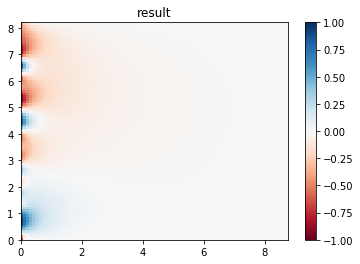

In [8]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
#z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

(91, 85)
(91, 85)


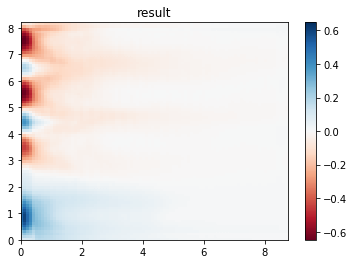

In [9]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
#z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

(95, 96)
(94, 95)


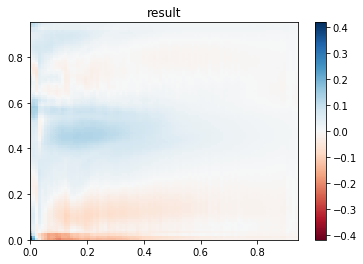

In [27]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]-1), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]-1), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
#z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,1:-1,1:-1] - soln[p_r,0,1:-1,1:-1]

#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()



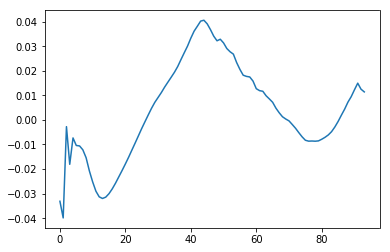

In [31]:
plt.plot(z[56,:])

In [35]:
mod.save_weights('Dirichlet_BC_NN_2B.h5')